In [6]:
!kaggle competitions download -c forest-cover-type-prediction
!unzip forest-cover-type-prediction.zip
!rm forest-cover-type-prediction.zip
!rm sampleSubmission.csv.zip test.csv.zip train.csv.zip

100%|██████████████████████████████████████| 25.3M/25.3M [00:09<00:00, 2.91MB/s]
100%|██████████████████████████████████████| 25.3M/25.3M [00:09<00:00, 2.72MB/s]
Archive:  forest-cover-type-prediction.zip
  inflating: sampleSubmission.csv    
  inflating: sampleSubmission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: test3.csv               
  inflating: train.csv               
  inflating: train.csv.zip           


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('train.csv')
df=df.set_index(['Id'])
df_test=pd.read_csv('test.csv')
df_test=df_test.set_index(['Id'])
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [2]:
df_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581008,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
581009,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
581010,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,...,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,...,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,...,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,...,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386,...,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144,...,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098,...,0.096261,-0.013129,0.034149,0.034638,0.029261,-0.035385,0.104682,-0.058979,-0.008203,-0.098905
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162,...,0.058244,0.024496,0.018298,0.000662,0.004545,-0.028055,0.069262,-0.056383,0.019158,-0.053399
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000,...,0.017055,0.049053,-0.009914,0.004767,-0.009244,0.033256,0.090648,0.047912,0.128467,-0.089389


In [4]:
df.Soil_Type7.unique()
df.Soil_Type15.unique()

array([0])

In [5]:
df.Cover_Type.corr((df.Hillshade_9am+df.Hillshade_Noon)/2)
#Toplanıp Noon atılabilir
df['Hillshade_Morn_Noon']=(df.Hillshade_9am+df.Hillshade_Noon)/2
df_test['Hillshade_Morn_Noon']=(df_test.Hillshade_9am+df_test.Hillshade_Noon)/2
df.drop(['Hillshade_Noon','Soil_Type7','Soil_Type15'],axis=1,inplace=True)
df_test.drop(['Hillshade_Noon','Soil_Type7','Soil_Type15'],axis=1,inplace=True)

In [6]:
df.Cover_Type.corr(np.sqrt(df.Horizontal_Distance_To_Hydrology**2+df.Vertical_Distance_To_Hydrology**2))
#0.57
df['Distance_Hydrology']=np.sqrt(df.Horizontal_Distance_To_Hydrology**2+df.Vertical_Distance_To_Hydrology**2)
df_test['Distance_Hydrology']=np.sqrt(df_test.Horizontal_Distance_To_Hydrology**2+df_test.Vertical_Distance_To_Hydrology**2)
df.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'],axis=1,inplace=True)
df_test.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'],axis=1,inplace=True)

In [7]:
df.Cover_Type.corr((df.Soil_Type3+df.Soil_Type4+df.Soil_Type5+df.Soil_Type8)/4)
#-0.26
df['Distance_Hydrology']=(df.Soil_Type3+df.Soil_Type4+df.Soil_Type5+df.Soil_Type8)/4
df.drop(['Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type8'],axis=1,inplace=True)

df_test['Distance_Hydrology']=(df_test.Soil_Type3+df_test.Soil_Type4+df_test.Soil_Type5+df_test.Soil_Type8)/4
df_test.drop(['Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type8'],axis=1,inplace=True)

In [8]:
df.Cover_Type.corr((df.Soil_Type10+df.Soil_Type11+df.Soil_Type12))
#Hepsi atılacak +27

df.drop(['Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type27'],axis=1,inplace=True)
df_test.drop(['Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type27'],axis=1,inplace=True)

In [9]:
df.Cover_Type.corr((df.Soil_Type24+df.Soil_Type25+df.Soil_Type26))
#atılacak 0.037
df.drop(['Soil_Type24','Soil_Type25','Soil_Type26'],axis=1,inplace=True)
df_test.drop(['Soil_Type24','Soil_Type25','Soil_Type26'],axis=1,inplace=True)

In [10]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type6',
       'Soil_Type9', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'Hillshade_Morn_Noon', 'Distance_Hydrology'],
      dtype='object')

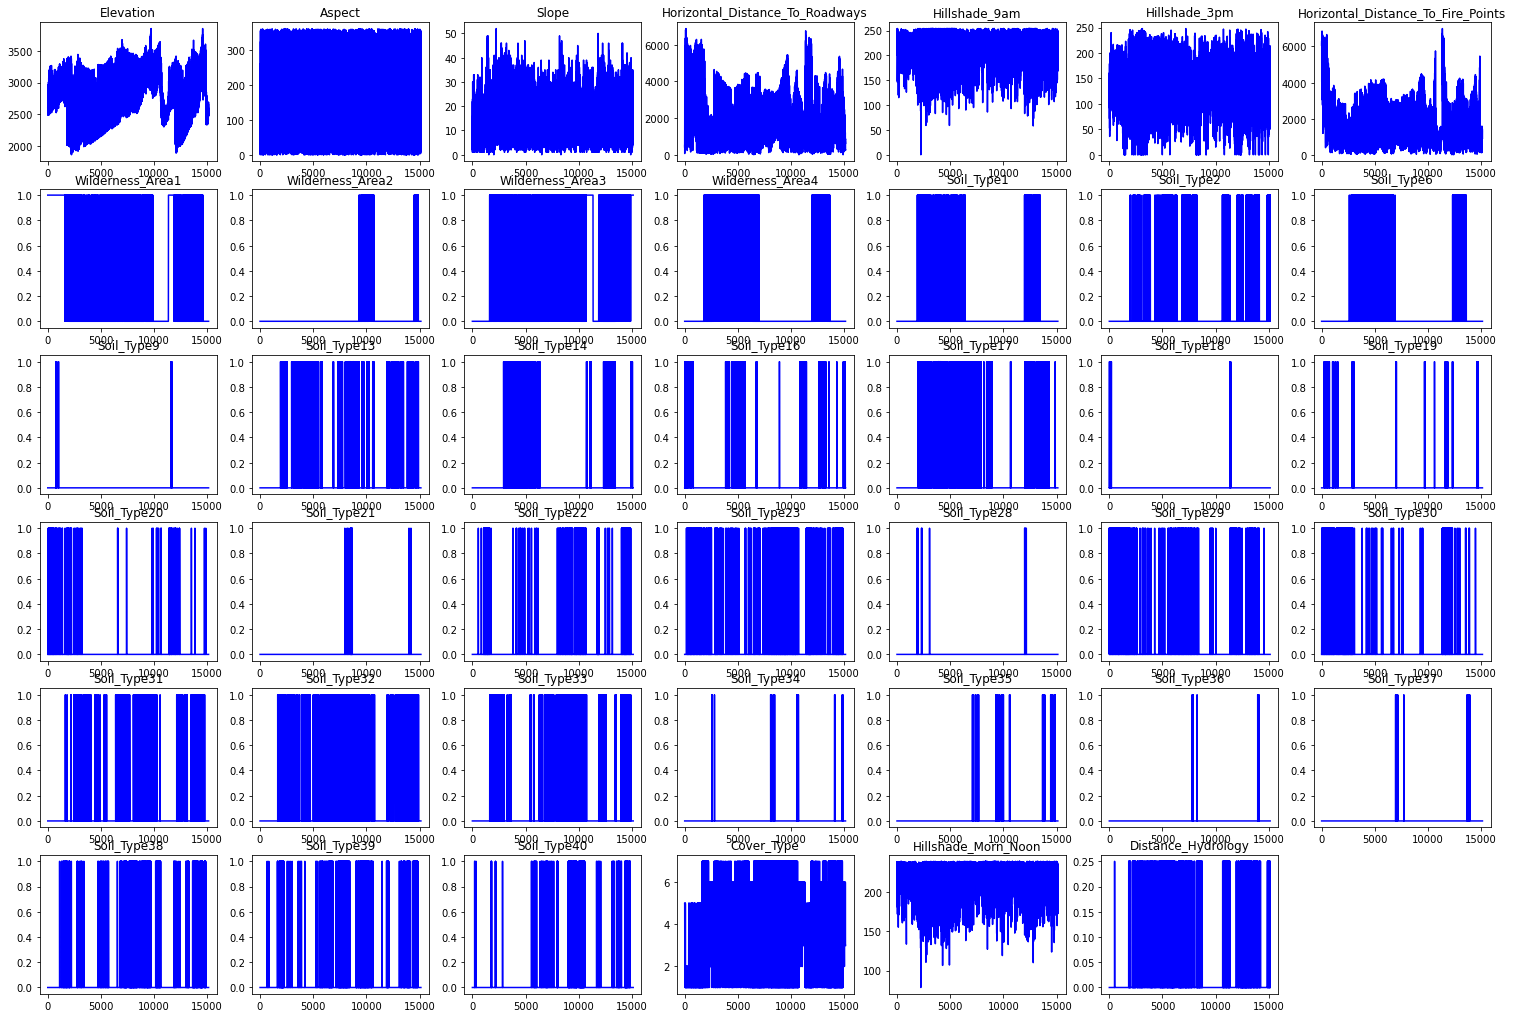

In [11]:
fig, ax1 = plt.subplots(figsize=(26, 24))

for i, col in enumerate(df.columns):
    plt.subplot(8, 7, i + 1)
    plt.plot(df[col], color='blue')
    plt.title(col)
    ax1.set_ylabel(col, color='b')

In [12]:
X=df.drop('Cover_Type', axis=1)
y=df.Cover_Type
y=y-1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X)
submission = scaler.transform(df_test)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [24]:
classifiers = {
    "NB": GaussianNB(),
    "SGD": SGDClassifier(),
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
for name, clf in classifiers.items():
    model = clf
    clf.fit(X_train,y_train)
    pred=clf.predict(X_val)


    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": accuracy_score(y_val,pred),
        "Avg_F1_Score": f1_score(y_val,pred,average='macro')
    }, ignore_index=True)
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
results

,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
8,XGB,0.883267,0.881021,0.882144
9,LGBM,0.87963,0.876918,0.878274
10,CatBoost,0.870701,0.867968,0.869335
7,MLP,0.833664,0.831045,0.832355
4,DT,0.808201,0.80611,0.807156
2,KNN,0.772817,0.767411,0.770114
6,SVM,0.743386,0.739098,0.741242
3,LR,0.71164,0.706497,0.709068
1,SGD,0.653439,0.647487,0.650463
5,RF,0.632937,0.606966,0.619951


In [27]:
clf=XGBClassifier()
#clf.fit(X_train_scaled,y_train)

params = {
    "learning_rate": (0.1, 0.01, 0.001),
    "max_depth": (5,6,7),
    'n_estimators':(100,120,130),
    'base_score': (0.6,0.75,0.8)
}
clf = GridSearchCV(clf, params, cv=10)
clf.fit(X_train, y_train)
prediction_xgb=clf.predict(submission)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'base_score': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 130}


In [28]:
clf=CatBoostClassifier(silent=True)
params = {
    "learning_rate": (0.1,0.02, 0.01),
    "max_depth": (5,6,7),
    'n_estimators':(120,130),
}
clf = GridSearchCV(clf, params, cv=10)
clf.fit(X_train, y_train)
prediction_cat=clf.predict(submission)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 130}


In [29]:
clf=LGBMClassifier()

params = {
    "learning_rate": (0.1,0.3, 0.01),
    'num_leaves': (29,31,33),
    "max_depth": (-1,5,6,7),
    'n_estimators':(100,120,150),
}
clf = GridSearchCV(clf, params, cv=10)
clf.fit(X_train, y_train)

prediction_lgb=clf.predict(submission)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'learning_rate': 0.3, 'max_depth': -1, 'n_estimators': 150, 'num_leaves': 33}


In [15]:
clf=XGBClassifier(base_score = 0.8, learning_rate = 0.1, max_depth = 7, n_estimators = 130)
clf.fit(X_train, y_train)
prediction_xgb=clf.predict(submission)

In [ ]:
clf=LGBMClassifier(num_leaves = 33, learning_rate = 0.3, max_depth = -1, n_estimators = 150)
clf.fit(X_train, y_train)
prediction_lgb=clf.predict(submission)

clf=CatBoostClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 130, silent=True)
clf.fit(X_train, y_train)
prediction_cat=clf.predict(submission)

In [16]:
sample_submission=pd.read_csv('sampleSubmission.csv',index_col='Id')
sample_submission['Cover_Type'] = prediction_xgb+1
sample_submission.to_csv('submission.csv')

In [1]:
!kaggle competitions submit -c forest-cover-type-prediction -f submission.csv -m "Hello There!"

/bin/bash: satır 1: kaggle: komut yok
